In [2]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ---------------- ----------------------- 61.4/151.4 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 151.4/151.4 kB 3.0 MB/s eta 0:00:00


In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
df = pd.read_csv('../data/query_output/query_1_extention.csv', index_col = False)

In [11]:
df.head()

,QUERY,Count(DISTINCT F.TIMEID)
0,world cup soccer\r,57
1,fifa world cup\r,38
2,fifaworldcup.com\r,35
3,soccer world cup\r,28
4,fifaworldcup\r,25


In [12]:
# remove \r from the query data
df['QUERY'] = df['QUERY'].str.replace('\r', '')

In [14]:
# Rename the column
df = df.rename(columns={'QUERY':'query', 'Count(DISTINCT F.TIMEID)': 'counts'})

In [16]:
df.head()

,query,counts
0,world cup soccer,57
1,fifa world cup,38
2,fifaworldcup.com,35
3,soccer world cup,28
4,fifaworldcup,25


In [25]:
# Convert DataFrame to dictionary
word_count = dict()

for index, row in df.iterrows():
    query = row.query
    value = row.counts
    
    keys = query.split(' ')
    
    for key in keys:
        if key in word_count.keys():
            word_count[key] = word_count[key] + value
        else: 
            word_count[key] = value

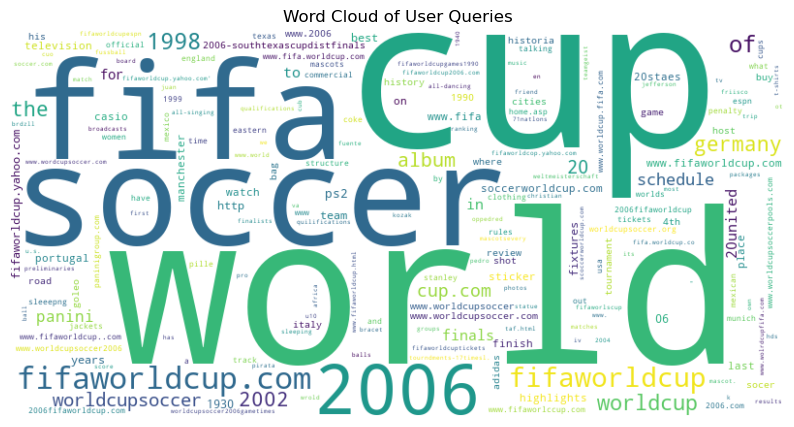

In [31]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title('Word Cloud of User Queries')

plt.savefig('../Visuals/plots/query_1_word_clouds.png')

plt.show()